In [682]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [683]:
alzheimers = pd.read_csv('Datasets/alzheimers.csv')
hyper = pd.read_csv('Datasets/hypertension.csv')
heart = pd.read_csv('Datasets/heart_disease.csv')
lung = pd.read_csv('Datasets/lung_cancer.csv')

In [684]:
pd.set_option('display.max_columns', 100)

In [685]:
alzheimers.columns = alzheimers.columns.str.strip().str.replace('’', '', regex=False)
alzheimers = alzheimers.rename(columns={
    'Genetic Risk Factor (APOE-ε4 allele)': 'Genetic Risk',
    'Urban vs Rural Living': 'Residence Type' 
})
print(alzheimers.columns)
alzheimers.head()

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimers', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk', 'Social Engagement Level', 'Income Level',
       'Stress Levels', 'Residence Type', 'Alzheimers Diagnosis'],
      dtype='object')


,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimers,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk,Social Engagement Level,Income Level,Stress Levels,Residence Type,Alzheimers Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [686]:
hyper.columns = hyper.columns.str.strip().str.replace('_', ' ', regex=False)
print(hyper.columns)
hyper.head()

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic BP', 'Diastolic BP',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity Level',
       'Family History', 'Diabetes', 'Stress Level', 'Salt Intake',
       'Sleep Duration', 'Heart Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education Level', 'Employment Status',
       'Hypertension'],
      dtype='object')


,Country,Age,BMI,Cholesterol,Systolic BP,Diastolic BP,Smoking Status,Alcohol Intake,Physical Activity Level,Family History,Diabetes,Stress Level,Salt Intake,Sleep Duration,Heart Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education Level,Employment Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,Yes,9,14.7,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,Yes,6,10.8,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,Yes,5,6.5,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,Yes,6,4.0,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,No,6,8.4,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [687]:
heart.columns = heart.columns.str.strip()
print(heart.columns)
heart.head()

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [688]:
lung.columns = lung.columns.str.strip().str.replace('_', ' ', regex=False)
print(lung.columns)
lung.head()

Index(['Country', 'Age', 'Gender', 'Smoking Status', 'Second Hand Smoke',
       'Air Pollution Exposure', 'Occupation Exposure', 'Rural or Urban',
       'Socioeconomic Status', 'Healthcare Access', 'Insurance Coverage',
       'Screening Availability', 'Stage at Diagnosis', 'Cancer Type',
       'Mutation Type', 'Treatment Access', 'Clinical Trial Access',
       'Language Barrier', 'Mortality Risk', '5 Year Survival Probability',
       'Delay in Diagnosis', 'Family History', 'Indoor Smoke Exposure',
       'Tobacco Marketing Exposure', 'Final Prediction'],
      dtype='object')


,Country,Age,Gender,Smoking Status,Second Hand Smoke,Air Pollution Exposure,Occupation Exposure,Rural or Urban,Socioeconomic Status,Healthcare Access,Insurance Coverage,Screening Availability,Stage at Diagnosis,Cancer Type,Mutation Type,Treatment Access,Clinical Trial Access,Language Barrier,Mortality Risk,5 Year Survival Probability,Delay in Diagnosis,Family History,Indoor Smoke Exposure,Tobacco Marketing Exposure,Final Prediction
0,Russia,82,Male,Former Smoker,Yes,Medium,No,Urban,High,Limited,Yes,Yes,II,NSCLC,EGFR,Partial,Yes,No,0.263278,0.797576,Yes,No,No,No,No
1,Thailand,66,Female,Former Smoker,No,High,No,Rural,Middle,Good,No,No,IV,NSCLC,EGFR,Partial,Yes,No,0.154697,0.336674,Yes,No,No,Yes,No
2,Colombia,87,Male,Former Smoker,No,Medium,No,Urban,Low,Poor,No,Yes,III,NSCLC,ALK,Partial,Yes,No,0.607435,0.063621,No,No,No,Yes,No
3,Egypt,51,Female,Former Smoker,No,Low,Yes,Rural,High,Good,No,No,IV,NSCLC,EGFR,Full,No,No,0.081184,0.336814,No,No,No,Yes,No
4,DR Congo,43,Male,Former Smoker,No,High,No,Urban,Middle,Good,Yes,No,IV,NSCLC,NaN,Full,No,No,0.643276,0.820103,No,No,No,No,No


In [689]:
#drop unnecessary columns
alzheimers.drop(['Country', 'Employment Status', 'Marital Status'], axis=1, inplace=True)
hyper.drop(['Country'], axis=1, inplace=True)
heart.drop(['Patient ID', 'Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)
lung.drop(['Country'], axis=1, inplace=True)

In [690]:
#initialize label encoder for columns where order preservation is unimportant
le = LabelEncoder()

#manual encoding for columns where order preservation is important
intensity = {'Low': 0, 'Medium': 1, 'High': 2}
quality = {'Poor': 0, 'Average': 1, 'Good': 2}
answer = {'No': 0, 'Yes': 1}

#one-hot encoding
alzheimers = pd.get_dummies(alzheimers, columns=['Gender'], prefix='Gender', dtype=int)

alzheimers['Physical Activity Level'] = alzheimers['Physical Activity Level'].map(intensity)
 
alzheimers['Smoking Status'] = alzheimers['Smoking Status'].map({'Never': 0, 'Former': 1, 'Current': 2}) #Other custom encoding maps

alzheimers['Alcohol Consumption'] = alzheimers['Alcohol Consumption'].map({'Never': 0, 'Occasionally': 1, 'Regularly': 2})

alzheimers['Cholesterol Level'] = alzheimers['Cholesterol Level'].map({'Normal': 0, 'High': 1})

alzheimers['Family History of Alzheimers'] = alzheimers['Family History of Alzheimers'].map(answer)

alzheimers['Depression Level'] = alzheimers['Depression Level'].map(intensity)

alzheimers['Sleep Quality'] = alzheimers['Sleep Quality'].map(quality)

alzheimers['Dietary Habits'] = alzheimers['Dietary Habits'].map({'Healthy': 0, 'Average': 1, 'Unhealthy': 2})

alzheimers['Air Pollution Exposure'] = alzheimers['Air Pollution Exposure'].map(intensity)

alzheimers['Genetic Risk'] = alzheimers['Genetic Risk'].map(answer)

alzheimers['Social Engagement Level'] = alzheimers['Social Engagement Level'].map(intensity)

alzheimers['Income Level'] = alzheimers['Income Level'].map(intensity)

alzheimers['Stress Levels'] = alzheimers['Stress Levels'].map(intensity)

#Rural = 0, urban = 1
alzheimers['Residence Type'] = le.fit_transform(alzheimers['Residence Type'])

#target variables
alzheimers['Alzheimers Diagnosis'] = alzheimers['Alzheimers Diagnosis'].map(answer)
alzheimers['Diabetes'] = alzheimers['Diabetes'].map(answer)
alzheimers['Hypertension'] = alzheimers['Hypertension'].map(answer)

In [691]:
print(alzheimers.describe())

                Age  Education Level           BMI  Physical Activity Level  \
count  74283.000000     74283.000000  74283.000000             74283.000000   
mean      71.964703         9.487514     26.780639                 1.001333   
std       12.980748         5.757020      4.764679                 0.817201   
min       50.000000         0.000000     18.500000                 0.000000   
25%       61.000000         4.000000     22.700000                 0.000000   
50%       72.000000         9.000000     26.800000                 1.000000   
75%       83.000000        14.000000     30.900000                 2.000000   
max       94.000000        19.000000     35.000000                 2.000000   

       Smoking Status  Alcohol Consumption      Diabetes  Hypertension  \
count    74283.000000         74283.000000  74283.000000  74283.000000   
mean         1.002356             0.998290      0.198646      0.298171   
std          0.817594             0.817168      0.398983      0.45

In [692]:
print(alzheimers.corr()['Alzheimers Diagnosis'].sort_values(key=lambda x: x.abs(), ascending=False))

Alzheimers Diagnosis            1.000000
Age                             0.419923
Genetic Risk                    0.194484
Family History of Alzheimers    0.140885
Stress Levels                   0.004393
Dietary Habits                  0.004364
Residence Type                 -0.004104
Air Pollution Exposure         -0.003995
Education Level                 0.003732
Smoking Status                 -0.003690
Social Engagement Level        -0.003003
Diabetes                       -0.002673
Physical Activity Level         0.002310
Cholesterol Level              -0.002104
Alcohol Consumption             0.001790
BMI                            -0.001703
Gender_Male                     0.001364
Gender_Female                  -0.001364
Hypertension                   -0.001178
Cognitive Test Score           -0.001142
Sleep Quality                  -0.001122
Depression Level                0.000483
Income Level                   -0.000390
Name: Alzheimers Diagnosis, dtype: float64


In [693]:
hyper.columns = hyper.columns.str.strip()
print(hyper.columns)
hyper.head()

Index(['Age', 'BMI', 'Cholesterol', 'Systolic BP', 'Diastolic BP',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity Level',
       'Family History', 'Diabetes', 'Stress Level', 'Salt Intake',
       'Sleep Duration', 'Heart Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education Level', 'Employment Status',
       'Hypertension'],
      dtype='object')


,Age,BMI,Cholesterol,Systolic BP,Diastolic BP,Smoking Status,Alcohol Intake,Physical Activity Level,Family History,Diabetes,Stress Level,Salt Intake,Sleep Duration,Heart Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education Level,Employment Status,Hypertension
0,58,29.5,230,160,79,Never,27.9,Low,Yes,Yes,9,14.7,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,34,36.2,201,120,84,Never,27.5,High,Yes,Yes,6,10.8,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,73,18.2,173,156,60,Current,1.8,High,Yes,Yes,5,6.5,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,60,20.3,183,122,94,Never,11.6,Moderate,Yes,Yes,6,4.0,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,73,21.8,296,91,97,Never,29.1,Moderate,Yes,No,6,8.4,5.0,52,108,74,226,157,Female,Primary,Employed,High


In [694]:
print(hyper['Education Level'].unique())
hyper['Smoking Status'] = hyper['Smoking Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
hyper['Physical Activity Level'] = hyper['Physical Activity Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

hyper['Family History'] = hyper['Family History'].map(answer)
hyper['Diabetes'] = hyper['Diabetes'].map(answer)

hyper = pd.get_dummies(hyper, columns=['Gender'], prefix='Gender', dtype=int)

hyper['Education Level'] = hyper['Education Level'].map({'Primary': 0, 'Secondary': 1, 'Tertiary': 2})

hyper['Employment Status'] = hyper['Employment Status'].map({'Unemployed' : 0, 'Retired': 1, 'Employed': 2})

#target variable
hyper['Hypertension'] = hyper['Hypertension'].map({'Low': 0, 'High': 1})

['Primary' 'Secondary' 'Tertiary']


In [695]:
print(hyper.head())

   Age   BMI  Cholesterol  Systolic BP  Diastolic BP  Smoking Status  \
0   58  29.5          230          160            79               0   
1   34  36.2          201          120            84               0   
2   73  18.2          173          156            60               2   
3   60  20.3          183          122            94               0   
4   73  21.8          296           91            97               0   

   Alcohol Intake  Physical Activity Level  Family History  Diabetes  \
0            27.9                        0               1         1   
1            27.5                        2               1         1   
2             1.8                        2               1         1   
3            11.6                        1               1         1   
4            29.1                        1               1         0   

   Stress Level  Salt Intake  Sleep Duration  Heart Rate  LDL  HDL  \
0             9         14.7             6.1          80  100   

In [696]:
hyper.describe()

,Age,BMI,Cholesterol,Systolic BP,Diastolic BP,Smoking Status,Alcohol Intake,Physical Activity Level,Family History,Diabetes,Stress Level,Salt Intake,Sleep Duration,Heart Rate,LDL,HDL,Triglycerides,Glucose,Education Level,Employment Status,Hypertension,Gender_Female,Gender_Male
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.00000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,1.00388,14.991069,1.000972,0.500000,0.498588,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187,0.999503,1.003286,0.718823,0.501052,0.498948
std,20.786353,7.213866,43.361589,26.019268,17.310789,0.81584,8.652624,0.816846,0.500001,0.499999,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882,0.815428,0.815681,0.449575,0.500000,0.500000
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,0.00000,7.500000,0.000000,0.000000,0.000000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,1.00000,15.000000,1.000000,0.500000,0.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,2.00000,22.500000,2.000000,1.000000,1.000000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,2.00000,30.000000,2.000000,1.000000,1.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000,2.000000,2.000000,1.000000,1.000000,1.000000


   High_Systolic  Hypertension
0              1             1
1              0             1
2              1             0
3              0             1
4              0             1
5              1             1
6              0             0
7              1             1
8              0             0
9              1             1
-0.0038261335809383124


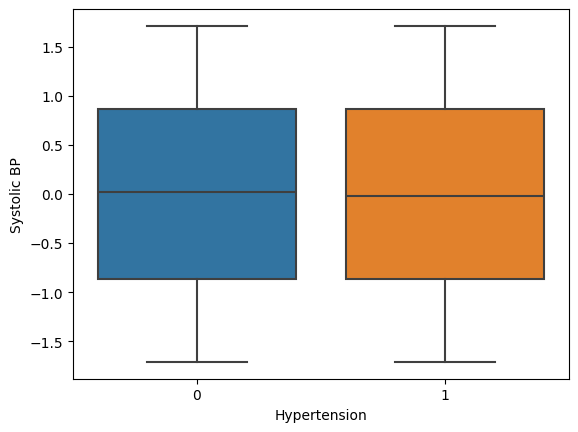

In [697]:

numerical_cols = ['Cholesterol', 'Age', 'LDL', 'Triglycerides', 'Systolic BP', 'Diastolic BP', 
                  'Alcohol Intake', 'BMI', 'Salt Intake', 'HDL', 'Stress Level', 'Sleep Duration', 
                  'Glucose', 'Heart Rate']
scaler = StandardScaler()
hyper['High_Systolic'] = (hyper['Systolic BP'] >= 140).astype(int)
print(hyper[['High_Systolic', 'Hypertension']].head(10))
print(hyper['High_Systolic'].corr(hyper['Hypertension']))
hyper[numerical_cols] = scaler.fit_transform(hyper[numerical_cols])
sns.boxplot(x='Hypertension', y='Systolic BP', data=hyper)
plt.show()

In [698]:
print(hyper.corr()['Hypertension'].sort_values(key=lambda x: x.abs(), ascending=False))

Hypertension               1.000000
Cholesterol               -0.004029
High_Systolic             -0.003826
Age                       -0.003325
Employment Status          0.003314
Gender_Male               -0.003209
Gender_Female              0.003209
LDL                       -0.003074
Physical Activity Level   -0.002695
Triglycerides              0.002586
Systolic BP               -0.002586
Smoking Status            -0.002416
Diastolic BP               0.002081
Alcohol Intake            -0.002054
Diabetes                   0.001705
BMI                       -0.001015
Family History             0.000826
Education Level            0.000819
Salt Intake                0.000682
HDL                        0.000576
Stress Level              -0.000469
Sleep Duration            -0.000155
Glucose                   -0.000128
Heart Rate                -0.000048
Name: Hypertension, dtype: float64


In [699]:
heart['Sex'] = le.fit_transform(heart['Sex'])

#split blood pressure number into two columns
heart[['Systolic BP', 'Diastolic BP']] = heart['Blood Pressure'].str.split('/', expand=True)
heart.drop('Blood Pressure', axis=1, inplace=True)

heart['Diet'] = heart['Diet'].map({'Healthy': 0, 'Average': 1, 'Unhealthy': 2})

In [700]:
heart.describe()
heart.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,1,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1,1.813242,2,1,0,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,0,2.078353,0,1,1,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,0,5.804299,2,1,0,6,1.514821,160555,21.809144,231,1,5,0,91,88


In [701]:
print(heart.corr()['Heart Attack Risk'].sort_values(key = lambda x: x.abs(), ascending = False))

Heart Attack Risk                  1.000000
Cholesterol                        0.019340
Systolic BP                        0.018585
Sleep Hours Per Day               -0.018528
Diabetes                           0.017225
Alcohol Consumption               -0.013778
Obesity                           -0.013318
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
Diastolic BP                      -0.007509
Age                                0.006403
Diet                              -0.005908
Sedentary Hours Per Day           -0.005613
Physical Activity Days Per Week   -0.005014
Heart Rate                        -0.004251
Stress Level                      -0.004111
Smoking                           -0.004051
Sex                                0.003095
Medication Use                     0.002234
Family History                    -0.001652
Previous Heart Problems            0.000274
BMI                             

In [702]:
lung.drop(columns = ['Stage at Diagnosis', 'Cancer Type', 'Mutation Type', 'Clinical Trial Access', 'Mortality Risk', 'Mutation Type', 'Language Barrier', 
                  'Mortality Risk', '5 Year Survival Probability', 'Delay in Diagnosis' 
                  ], axis = 1, inplace = True)
print(lung.columns)

Index(['Age', 'Gender', 'Smoking Status', 'Second Hand Smoke',
       'Air Pollution Exposure', 'Occupation Exposure', 'Rural or Urban',
       'Socioeconomic Status', 'Healthcare Access', 'Insurance Coverage',
       'Screening Availability', 'Treatment Access', 'Family History',
       'Indoor Smoke Exposure', 'Tobacco Marketing Exposure',
       'Final Prediction'],
      dtype='object')


In [703]:
#Female = 0, male = 1
lung['Gender'] = le.fit_transform(lung['Gender'])

lung['Smoking Status'] = lung['Smoking Status'].map({'Non-Smoker': 0, 'Former Smoker': 1, 'Current Smoker': 2})

lung['Second Hand Smoke'] = lung['Second Hand Smoke'].map(answer)

lung['Air Pollution Exposure'] = lung['Air Pollution Exposure'].map(intensity)

lung['Occupation Exposure'] = lung['Occupation Exposure'].map(answer)

#Rural = 0, urban = 1
lung['Rural or Urban'] = le.fit_transform(lung['Rural or Urban'])

lung['Smoking Status'] = lung['Smoking Status'].map({'Non Smoker': 0, 'Former Smoker': 1, 'Current Smoker': 2})

lung['Socioeconomic Status'] = lung['Socioeconomic Status'].map({'Low' : 0, 'Medium': 1, 'High': 2})

lung['Healthcare Access'] = lung['Healthcare Access'].map({'Poor': 0, 'Limited': 1, 'Good': 2})

lung['Insurance Coverage'] = lung['Insurance Coverage'].map(answer)

lung['Screening Availability'] = lung['Screening Availability'].map(answer)

lung['Treatment Access'] = lung['Treatment Access'].map({'Partial': 0, 'Full' : 1})

lung['Indoor Smoke Exposure'] = lung['Indoor Smoke Exposure'].map(answer)

lung['Family History'] = lung['Family History'].map(answer)

lung['Tobacco Marketing Exposure'] = lung['Tobacco Marketing Exposure'].map(answer)
#target variable
lung['Final Prediction'] = lung['Final Prediction'].map(answer)


print(lung.head())

   Age  Gender  Smoking Status  Second Hand Smoke  Air Pollution Exposure  \
0   82       1             NaN                  1                       1   
1   66       0             NaN                  0                       2   
2   87       1             NaN                  0                       1   
3   51       0             NaN                  0                       0   
4   43       1             NaN                  0                       2   

   Occupation Exposure  Rural or Urban  Socioeconomic Status  \
0                    0               1                   2.0   
1                    0               0                   NaN   
2                    0               1                   0.0   
3                    1               0                   2.0   
4                    0               1                   NaN   

   Healthcare Access  Insurance Coverage  Screening Availability  \
0                  1                   1                       1   
1               

In [704]:
print(lung.corr()['Final Prediction'].sort_values(key = lambda x: x.abs(), ascending = False))

Final Prediction              1.000000
Screening Availability        0.002890
Rural or Urban                0.002769
Gender                        0.002341
Socioeconomic Status         -0.001386
Second Hand Smoke            -0.001080
Treatment Access             -0.000971
Insurance Coverage           -0.000906
Family History               -0.000905
Tobacco Marketing Exposure    0.000703
Air Pollution Exposure       -0.000622
Indoor Smoke Exposure        -0.000412
Age                           0.000393
Occupation Exposure          -0.000166
Healthcare Access             0.000075
Smoking Status                     NaN
Name: Final Prediction, dtype: float64
